In [3]:
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    database='bikes',
    user='root',
    password='root'
)
db.is_connected()

True

In [ ]:
import pandas as pd

# Cargar tablas en dataframes
customers_df = pd.read_sql("SELECT * FROM `customers`", db)
orders_df    = pd.read_sql("SELECT * FROM `orders`", db)
products_df  = pd.read_sql("SELECT * FROM `products`", db)
staffs_df = pd.read_sql("SELECT * FROM `staffs`", db)
stocks_df = pd.read_sql("SELECT * FROM `stocks`", db)
stores_df = pd.read_sql("SELECT * FROM `stores`", db)

stores_df.head()

C:\Users\formacio\AppData\Local\Temp\ipykernel_8028\3427587512.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_df = pd.read_sql("SELECT * FROM `customers`", db)
C:\Users\formacio\AppData\Local\Temp\ipykernel_8028\3427587512.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_df = pd.read_sql("SELECT * FROM `orders`", db)
C:\Users\formacio\AppData\Local\Temp\ipykernel_8028\3427587512.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_df = pd.read_sql("SELECT * FROM `products`", db)
C:\Users\for

,store_id,store_name,phone,email,street,city,state,zip_code,product_id,total_stocks
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060,None,4532.0
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432,None,4359.0
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088,None,4620.0


In [6]:
customers_df.head(7)

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
5,6,Lyndsey,Bean,None,lyndsey.bean@hotmail.com,769 West Road,Fairport,NY,14450
6,7,Latasha,Hays,(716) 986-3359,latasha.hays@hotmail.com,7014 Manor Station Rd.,Buffalo,NY,14215


In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1445 non-null   int64 
 1   first_name   1445 non-null   object
 2   last_name    1445 non-null   object
 3   phone        178 non-null    object
 4   email        1445 non-null   object
 5   street       1445 non-null   object
 6   city         1445 non-null   object
 7   state        1445 non-null   object
 8   zip_code     1445 non-null   object
dtypes: int64(1), object(8)
memory usage: 101.7+ KB


<Axes: xlabel='city'>

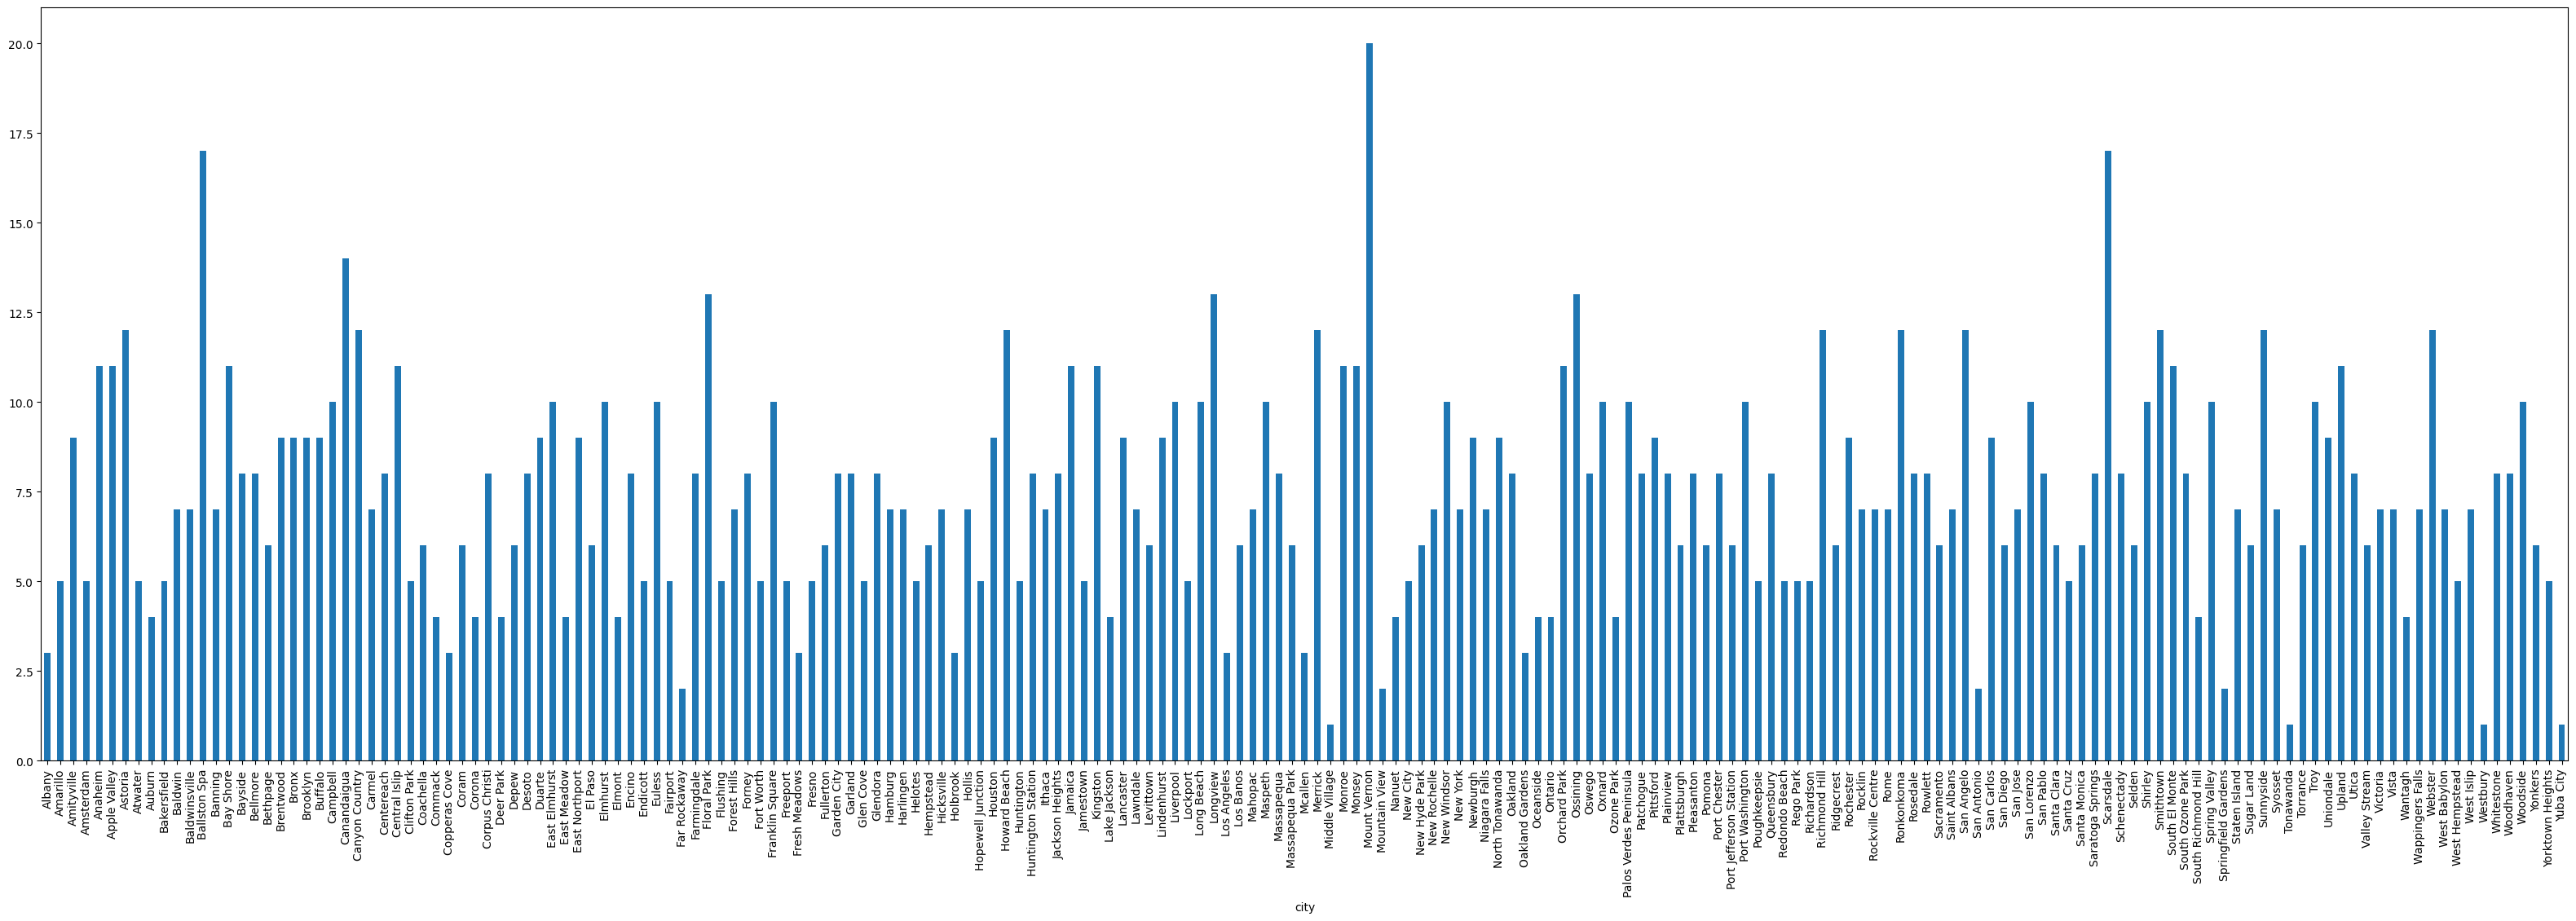

In [ ]:
# Cantidad de clientes por ciudad

customers_df.groupby('city')['city'] \
            .count() \
            .plot.bar(x='city', figsize=(40,12))

<Axes: xlabel='list_price'>

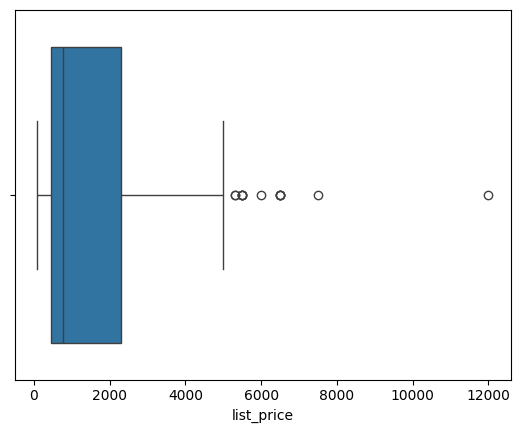

In [27]:
# products_df.head()

# products_df['list_price'].plot.hist()
import seaborn as sbn
sbn.boxplot(data=products_df, x='list_price')

<Axes: xlabel='category_name'>

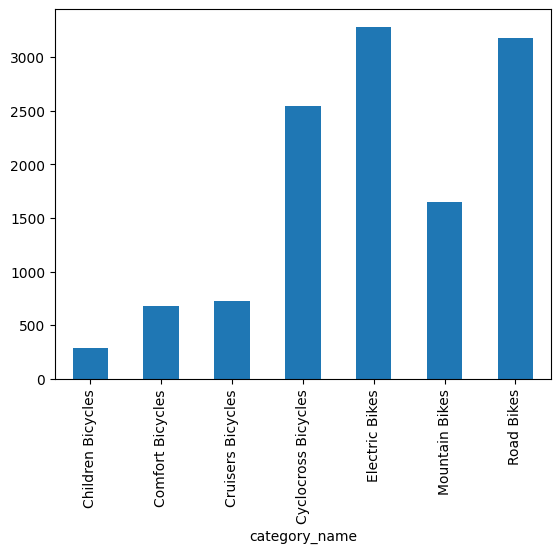

In [32]:
products_df.groupby('category_name')['list_price'].mean().plot.bar()

<Axes: xlabel='city'>

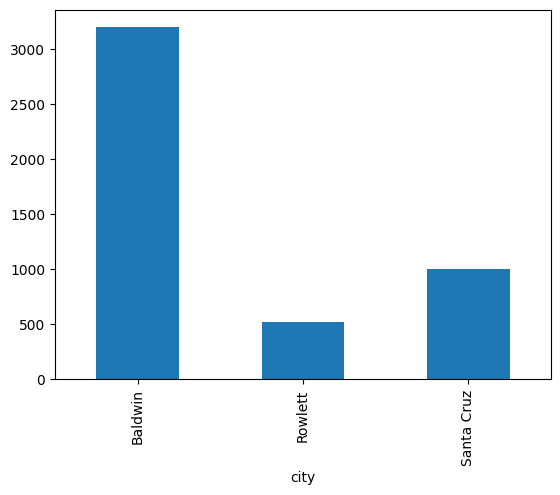

In [47]:
# Pedidos por ciudad
orders_df.merge(stores_df, on='store_id') \
         .groupby('city')['order_id'].count() \
         .plot.bar()

In [78]:
# ventas totales por empleado y ciudad de la tienda
vendedoresdf = orders_df.merge(stores_df, on='store_id') \
        .merge(staffs_df,  on='staff_id')[orders_df['order_status']=='Completed'] \
        .groupby(['city', 'staff_id', 'first_name', 'last_name'])[['order_id']].count()
vendedoresdf

order_id
city       staff_id first_name last_name          
Baldwin    6        Marcelene  Boyer          1499
           7        Venita     Daniel         1466
Rowlett    8        Kali       Vargas          219
           9        Layla      Terrell         212
Santa Cruz 2        Mireya     Copeland        388
           3        Genna      Serrano         430

In [96]:
vdf = vendedoresdf.reset_index()
vdf = vdf.set_index('city')
vdf

,staff_id,first_name,last_name,order_id
city,,,,
Baldwin,6,Marcelene,Boyer,1499
Baldwin,7,Venita,Daniel,1466
Rowlett,8,Kali,Vargas,219
Rowlett,9,Layla,Terrell,212
Santa Cruz,2,Mireya,Copeland,388
Santa Cruz,3,Genna,Serrano,430


<Axes: xlabel='city', ylabel='order_id'>

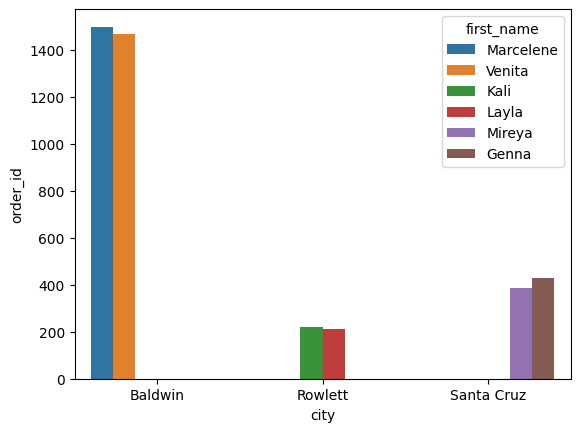

In [98]:
import seaborn as sbn

sbn.barplot(data=vdf, x='city', y='order_id', hue='first_name')